In [1]:
import numpy as np 
from PIL import Image 
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
# Define target size for image resizing (256x256 pixels)
obj_resize = (256, 256)

# Load duck images from the Willow Object Dataset
# These images will be used for feature matching -
img1 = Image.open('./../data/WillowObject/WILLOW-ObjectClass/Duck/060_0000.png')  # Load first duck image
img2 = Image.open('./../data/WillowObject/WILLOW-ObjectClass/Duck/060_0010.png')  # Load second duck image

# Load keypoint annotations from corresponding .mat files
# 'pts_coord' contains the coordinates of manually annotated keypoints for each image
# Convert the MATLAB format to NumPy arrays for easier processing
kpts1 = np.array(sio.loadmat('./../data/WillowObject/WILLOW-ObjectClass/Duck/060_0000.mat')['pts_coord'])  # Keypoints for first image
kpts2 = np.array(sio.loadmat('./../data/WillowObject/WILLOW-ObjectClass/Duck/060_0010.mat')['pts_coord'])  # Keypoints for second image

# Scale keypoint coordinates to match the new image dimensions
# This ensures keypoints remain aligned when images are resized
kpts1[0] = kpts1[0] * obj_resize[0] / img1.size[0]  # Scale x-coordinates of first image keypoints
kpts1[1] = kpts1[1] * obj_resize[1] / img1.size[1]  # Scale y-coordinates of first image keypoints
kpts2[0] = kpts2[0] * obj_resize[0] / img2.size[0]  # Scale x-coordinates of second image keypoints
kpts2[1] = kpts2[1] * obj_resize[1] / img2.size[1]  # Scale y-coordinates of second image keypoints

# Resize both images to the target size (256x256)
# Using BILINEAR interpolation for smooth resizing
img1 = img1.resize(obj_resize, resample=Image.BILINEAR)  # Resize first image
img2 = img2.resize(obj_resize, resample=Image.BILINEAR)  # Resize second image

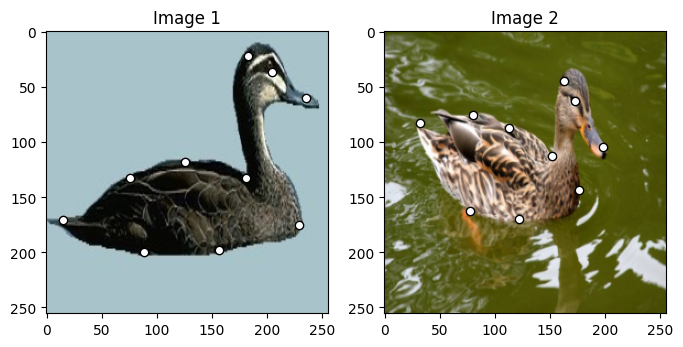

In [3]:
def plot_image_with_graph(img, kpt, A=None):
   """
   Function to visualize an image with keypoints and optional graph connections
   
   Parameters:
   - img: Input image to be displayed
   - kpt: Keypoints array with shape (2, N) where N is number of keypoints
   - A: Optional adjacency matrix for drawing connections between keypoints
   """
   # Display the input image
   plt.imshow(img)
   
   # Plot keypoints as white dots with black edges
   plt.scatter(kpt[0], kpt[1], c='w', edgecolors='k')
   
   # If an adjacency matrix is provided, draw connections between keypoints
   if A is not None:
       # Iterate through non-zero elements in adjacency matrix
       for idx in np.nonzero(A, as_tuple=False):
           # Draw black lines between connected keypoints
           # idx[0] is start point index, idx[1] is end point index
           plt.plot((kpt[0, idx[0]], kpt[0, idx[1]]), # x-coordinates of line
                   (kpt[1, idx[0]], kpt[1, idx[1]]),  # y-coordinates of line
                   'k-')                               # black solid line style

# Create a figure with specific size (8 inches width, 4 inches height)
plt.figure(figsize=(8, 4))

# Create first subplot for Image 1
plt.subplot(1, 2, 1)          # 1 row, 2 columns, first position
plt.title('Image 1')          # Set title for first subplot
plot_image_with_graph(img1, kpts1)  # Plot first image with its keypoints

# Create second subplot for Image 2
plt.subplot(1, 2, 2)          # 1 row, 2 columns, second position
plt.title('Image 2')          # Set title for second subplot
plot_image_with_graph(img2, kpts2)  # Plot second image with its keypoints

In [ ]:
def getting():
    ...
def resizing():
    ...
def plotting():
    ...

In [ ]:
from enum import Enum

class Categories(Enum):
    Car = 1
    Duck = 2
    Face = 3
    Motorbike = 4
    Winebottle = 5